#Dados

In [1]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 50.2 MB/s eta 0:00:00


In [2]:
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import itertools
import torch
from torch import nn
from tqdm.notebook import tqdm
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import NesterovMomentumOptimizer

In [3]:
dataset=pd.read_csv('/content/alunos.csv', sep=";")
dataset.head()

,NU_ANO_CENSO,ID_ALUNO,ID_MATRICULA,NU_MES,NU_ANO,NU_IDADE_REFERENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,...,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_OSCIP,IN_MANT_ESCOLA_PRIV_ONG_OSCIP,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,TP_REGULAMENTACAO,TP_LOCALIZACAO_DIFERENCIADA,IN_EDUCACAO_INDIGENA
0,2020,790269B39914035DE33BCB827C4F2D83,435039863.0,12.0,2009.0,10.0,11.0,2.0,3.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2020,311363D9AB845EB53D7D6F12FE657CF9,351780516.0,6.0,2008.0,11.0,12.0,2.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2020,0CFD8C53003C50D16BC9DE8E1CAFF658,419928618.0,4.0,2008.0,12.0,12.0,2.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,2020,D295E28AA9D03AC4586E93B822E86C93,422248877.0,6.0,2017.0,2.0,3.0,1.0,3.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2020,44066D73C8A75DD9611F8272BE80AC74,404705028.0,5.0,2013.0,7.0,7.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [4]:


colunas_mantidas = [
    'ID_ALUNO', 'ID_MATRICULA', 'NU_MES', 'NU_ANO', 'NU_IDADE',
    'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_DEPENDENCIA','TP_LOCALIZACAO',
    'IN_AUTISMO']

dataset = dataset[colunas_mantidas]

dataset.head()


,ID_ALUNO,ID_MATRICULA,NU_MES,NU_ANO,NU_IDADE,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_DEPENDENCIA,TP_LOCALIZACAO,IN_AUTISMO
0,790269B39914035DE33BCB827C4F2D83,435039863.0,12.0,2009.0,11.0,11.0,2.0,3.0,4.0,1.0,NaN
1,311363D9AB845EB53D7D6F12FE657CF9,351780516.0,6.0,2008.0,12.0,12.0,2.0,1.0,4.0,1.0,NaN
2,0CFD8C53003C50D16BC9DE8E1CAFF658,419928618.0,4.0,2008.0,12.0,12.0,2.0,1.0,4.0,1.0,NaN
3,D295E28AA9D03AC4586E93B822E86C93,422248877.0,6.0,2017.0,3.0,3.0,1.0,3.0,4.0,1.0,NaN
4,44066D73C8A75DD9611F8272BE80AC74,404705028.0,5.0,2013.0,7.0,7.0,1.0,1.0,4.0,1.0,NaN


In [5]:

dataset['IN_AUTISMO'] = dataset['IN_AUTISMO'].fillna(0)

dataset['IN_AUTISMO'] = dataset['IN_AUTISMO'].apply(lambda x: 1 if x != 0 else 0)

dataset.head()


<ipython-input-5-3d1c14c347c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['IN_AUTISMO'] = dataset['IN_AUTISMO'].fillna(0)
<ipython-input-5-3d1c14c347c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['IN_AUTISMO'] = dataset['IN_AUTISMO'].apply(lambda x: 1 if x != 0 else 0)


,ID_ALUNO,ID_MATRICULA,NU_MES,NU_ANO,NU_IDADE,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_DEPENDENCIA,TP_LOCALIZACAO,IN_AUTISMO
0,790269B39914035DE33BCB827C4F2D83,435039863.0,12.0,2009.0,11.0,11.0,2.0,3.0,4.0,1.0,0
1,311363D9AB845EB53D7D6F12FE657CF9,351780516.0,6.0,2008.0,12.0,12.0,2.0,1.0,4.0,1.0,0
2,0CFD8C53003C50D16BC9DE8E1CAFF658,419928618.0,4.0,2008.0,12.0,12.0,2.0,1.0,4.0,1.0,0
3,D295E28AA9D03AC4586E93B822E86C93,422248877.0,6.0,2017.0,3.0,3.0,1.0,3.0,4.0,1.0,0
4,44066D73C8A75DD9611F8272BE80AC74,404705028.0,5.0,2013.0,7.0,7.0,1.0,1.0,4.0,1.0,0


In [6]:

dataset['TP_COR_RACA'] = dataset['TP_COR_RACA'].replace({0: 'Não declarada', 1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela', 5: 'Indígena'})

print(dataset['TP_COR_RACA'].unique())


['Parda' 'Branca' 'Não declarada' 'Preta' 'Amarela' 'Indígena' nan]


<ipython-input-6-48073a58f9ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['TP_COR_RACA'] = dataset['TP_COR_RACA'].replace({0: 'Não declarada', 1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela', 5: 'Indígena'})


In [7]:

dataset['TP_DEPENDENCIA'] = dataset['TP_DEPENDENCIA'].replace({ 1: 'Federal', 2: 'Municipal', 3: 'Estadual', 4: 'Privada'})

print(dataset['TP_DEPENDENCIA'].unique())

['Privada' 'Municipal' 'Federal' 'Estadual' nan]


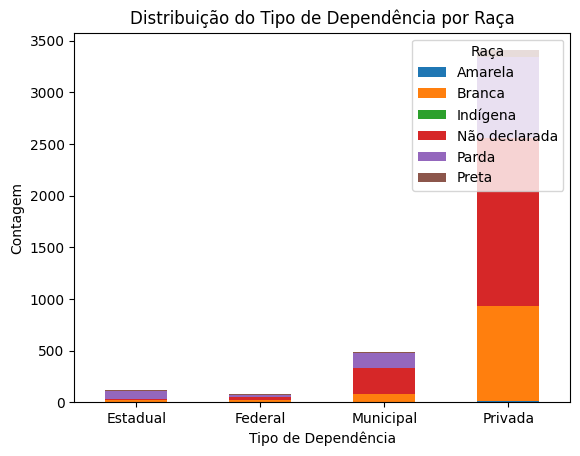

In [8]:
import matplotlib.pyplot as plt

cross_tab = pd.crosstab(dataset['TP_DEPENDENCIA'], dataset['TP_COR_RACA'])

cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Tipo de Dependência')
plt.ylabel('Contagem')
plt.title('Distribuição do Tipo de Dependência por Raça')
plt.xticks(rotation=0)
plt.legend(title='Raça', loc='upper right')
plt.show()


In [9]:
dataset = dataset.drop(columns=['ID_ALUNO','ID_MATRICULA','NU_MES','TP_LOCALIZACAO' ])
dataset.head(10)

,NU_ANO,NU_IDADE,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_DEPENDENCIA,IN_AUTISMO
0,2009.0,11.0,11.0,2.0,Parda,Privada,0
1,2008.0,12.0,12.0,2.0,Branca,Privada,0
2,2008.0,12.0,12.0,2.0,Branca,Privada,0
3,2017.0,3.0,3.0,1.0,Parda,Privada,0
4,2013.0,7.0,7.0,1.0,Branca,Privada,0
5,2012.0,8.0,8.0,1.0,Branca,Privada,0
6,2008.0,12.0,12.0,1.0,Não declarada,Privada,0
7,2012.0,8.0,8.0,2.0,Branca,Privada,0
8,2014.0,6.0,6.0,2.0,Não declarada,Privada,0
9,2015.0,5.0,5.0,2.0,Branca,Privada,0


In [10]:
dataset = dataset.loc[(dataset['TP_COR_RACA'] != 'Não declarada') & (dataset['TP_COR_RACA'] != 'Indígena')]

print(dataset['TP_COR_RACA'].unique())


['Parda' 'Branca' 'Preta' 'Amarela' nan]


In [11]:

dataset["TP_COR_RACA"] = dataset["TP_COR_RACA"].map({"Branca":0,"Parda":1,"Preta":2,"Amarela":1})
dataset.head(10)

,NU_ANO,NU_IDADE,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_DEPENDENCIA,IN_AUTISMO
0,2009.0,11.0,11.0,2.0,1.0,Privada,0
1,2008.0,12.0,12.0,2.0,0.0,Privada,0
2,2008.0,12.0,12.0,2.0,0.0,Privada,0
3,2017.0,3.0,3.0,1.0,1.0,Privada,0
4,2013.0,7.0,7.0,1.0,0.0,Privada,0
5,2012.0,8.0,8.0,1.0,0.0,Privada,0
7,2012.0,8.0,8.0,2.0,0.0,Privada,0
9,2015.0,5.0,5.0,2.0,0.0,Privada,0
13,1994.0,26.0,26.0,2.0,1.0,Municipal,0
15,2007.0,13.0,13.0,1.0,0.0,Privada,0


In [12]:
print(dataset['TP_COR_RACA'].unique())

[ 1.  0.  2. nan]


In [13]:
dataset.describe()

,NU_ANO,NU_IDADE,NU_IDADE,TP_SEXO,TP_COR_RACA,IN_AUTISMO
count,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2182.000000
mean,2009.293902,10.706098,10.706098,1.515818,0.558459,0.008708
std,6.771182,6.771182,6.771182,0.499864,0.573016,0.092929
min,1965.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,2006.000000,5.000000,5.000000,1.000000,0.000000,0.000000
50%,2010.000000,10.000000,10.000000,2.000000,1.000000,0.000000
75%,2015.000000,14.000000,14.000000,2.000000,1.000000,0.000000
max,2019.000000,55.000000,55.000000,2.000000,2.000000,1.000000


In [ ]:

dataset = dataset[[col for col in dataset if col != 'TP_COR_RACA'] + ['TP_COR_RACA']]
dataset.head()

,NU_ANO,NU_IDADE,NU_IDADE,NU_IDADE,NU_IDADE,TP_SEXO,TP_DEPENDENCIA,IN_AUTISMO,TP_COR_RACA
0,2009.0,11.0,11.0,11.0,11.0,2.0,Privada,0,1.0
1,2008.0,12.0,12.0,12.0,12.0,2.0,Privada,0,0.0
2,2008.0,12.0,12.0,12.0,12.0,2.0,Privada,0,0.0
3,2017.0,3.0,3.0,3.0,3.0,1.0,Privada,0,1.0
4,2013.0,7.0,7.0,7.0,7.0,1.0,Privada,0,0.0


In [15]:
dataset = dataset.loc[:,~dataset.columns.duplicated()]
print(dataset.head())

   NU_ANO  NU_IDADE  TP_SEXO TP_DEPENDENCIA  IN_AUTISMO  TP_COR_RACA
0  2009.0      11.0      2.0        Privada           0          1.0
1  2008.0      12.0      2.0        Privada           0          0.0
2  2008.0      12.0      2.0        Privada           0          0.0
3  2017.0       3.0      1.0        Privada           0          1.0
4  2013.0       7.0      1.0        Privada           0          0.0


In [16]:
dataset['TP_DEPENDENCIA'] = dataset['TP_DEPENDENCIA'].replace({ 'Federal':10 , 'Municipal':4 , 'Estadual':6 , 'Privada':8 })
print(dataset['TP_DEPENDENCIA'].unique())
dataset.head()

[ 8.  4. 10.  6. nan]


,NU_ANO,NU_IDADE,TP_SEXO,TP_DEPENDENCIA,IN_AUTISMO,TP_COR_RACA
0,2009.0,11.0,2.0,8.0,0,1.0
1,2008.0,12.0,2.0,8.0,0,0.0
2,2008.0,12.0,2.0,8.0,0,0.0
3,2017.0,3.0,1.0,8.0,0,1.0
4,2013.0,7.0,1.0,8.0,0,0.0


In [17]:
dataset = dataset.drop(columns=['TP_DEPENDENCIA' ])
dataset=dataset.head(200)
dataset.head()

,NU_ANO,NU_IDADE,TP_SEXO,IN_AUTISMO,TP_COR_RACA
0,2009.0,11.0,2.0,0,1.0
1,2008.0,12.0,2.0,0,0.0
2,2008.0,12.0,2.0,0,0.0
3,2017.0,3.0,1.0,0,1.0
4,2013.0,7.0,1.0,0,0.0


In [18]:
cols = list(dataset.columns)[:-1]
col_pairs = list(itertools.product(cols,cols))
col_pairs = list(filter(lambda x: (x[0]!=x[1]) ,col_pairs))
print(len(col_pairs))

12


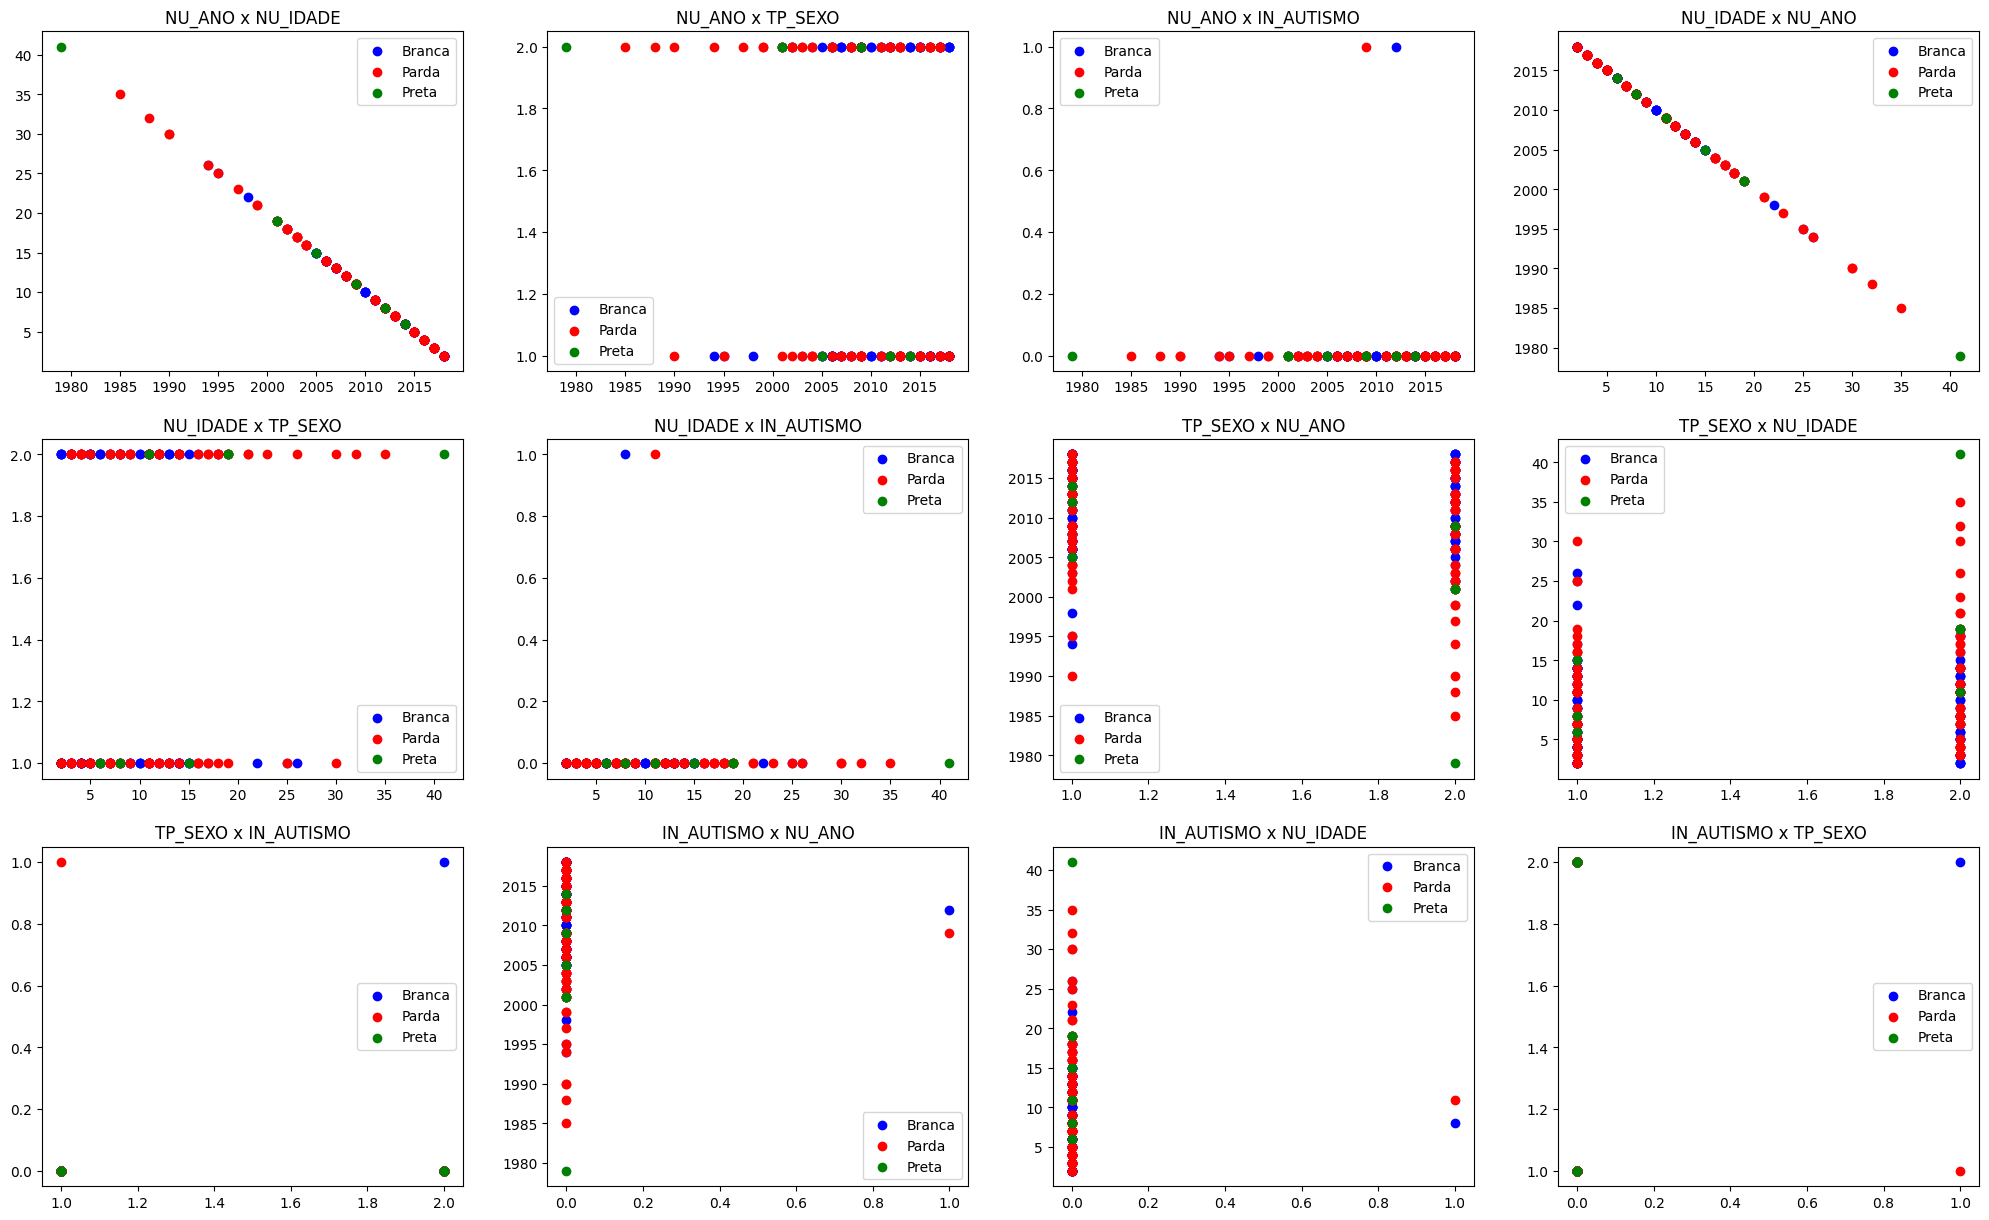

In [20]:
fig = plt.figure(figsize=(25, 15))

for i,(col4,col1) in enumerate(col_pairs):
    plot = plt.subplot(3,4, i+1)
    plot.set_title(f"{col4} x {col1}")
    plot.scatter(dataset[col4][dataset["TP_COR_RACA"]==0], dataset[col1][dataset["TP_COR_RACA"]==0], c="b", marker="o",label="Branca")
    plot.scatter(dataset[col4][dataset["TP_COR_RACA"]==1], dataset[col1][dataset["TP_COR_RACA"]==1], c="r", marker="o",label="Parda")
    plot.scatter(dataset[col4][dataset["TP_COR_RACA"]==2], dataset[col1][dataset["TP_COR_RACA"]==2], c="g", marker="o",label="Preta")
    plot.legend()

plt.show()


#.

In [57]:
from pennylane import numpy as np
import pennylane as qml

X = dataset.drop(columns=['TP_COR_RACA']).to_numpy()
y = dataset['TP_COR_RACA'].to_numpy()
print("X=",X[:3])
print("y=",y[:3])

X= [[2.009e+03 1.100e+01 2.000e+00 0.000e+00]
 [2.008e+03 1.200e+01 2.000e+00 0.000e+00]
 [2.008e+03 1.200e+01 2.000e+00 0.000e+00]]
y= [1. 0. 0.]


In [58]:
#def oneHot(x):
   # r = np.array([0,0,0])
    #r[x] = 1
  # return r

#def inverse(x):
    #return np.argmax(x)


#print(y[:10])
#y = np.array(list(map(oneHot,y)))
#print(y[:10])

In [59]:
#X = torch.from_numpy(X).type(torch.float)
#y = torch.from_numpy(y).type(torch.float)

#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.25, stratify=y, random_state = 12)

#Modelo e Treino

In [60]:
#device = "cuda" if torch.cuda.is_available() else "cpu"
#device

In [61]:
#Modelo

#class NeuralNet(nn.Module):
 #   def __init__(self):
 #       super(NeuralNet,self).__init__()
 #       size = 20
 #       self.relu       = nn.ReLU()
 #       self.softmax    = nn.Softmax(dim=1)
 #       self.input      = nn.Linear(4, size)
 #       self.h1         = nn.Linear(size,size)
 #       self.h2         = nn.Linear(size,size)
 #       self.output     = nn.Linear(size,3)

 #   def forward(self,x):
 #     out = self.relu(self.input(x))
 #       out = self.relu(self.h1(out))
 #       out = self.relu(self.h2(out))
 #       out = self.softmax(self.output(out))

 #       return out

#net = NeuralNet()

#print(net.parameters)


In [62]:

#criterion = nn.CrossEntropyLoss()
#opt = torch.optim.Adam(net.parameters(),lr = 1e-2)

#n_it = 1000
#pbar = tqdm(range(n_it))

#for it in pbar:
#    #Foward Pass
#    pred = net(X_train)
#    loss = criterion(pred,y_train)
#    #backward pass
#   loss.backward()
#   #update
#    opt.step()
#    opt.zero_grad()

#    pbar.set_description(f"Iteration {it+1:5d} | Loss = {loss.item():.6f}")

#    if loss.item() < 0.0001:
#        break


#Avaliando

In [63]:
#import pandas # Processamendo de dados

#from matplotlib import pyplot as plt # Visualização de dados

#from sklearn.model_selection import train_test_split
#from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#import itertools

#import pennylane as qml
#from pennylane import numpy as np
#from pennylane.optimize import NesterovMomentumOptimizer

In [64]:
#with torch.no_grad():
#    pred = net(X_train)
#    pred = pred.detach().numpy()

#    y_train_ = np.array(list(map(inverse,y_train)))
#    pred = np.array(list(map(inverse,pred)))

#   print(classification_report(y_train_,pred))

In [65]:
#with torch.no_grad():
#    pred = net(X_test)
#    pred = pred.detach().numpy()

#    y_test_ = np.array(list(map(inverse,y_test)))
#    pred = np.array(list(map(inverse,pred)))

#    print(classification_report(y_test_,pred))

In [66]:
#fig, ax = plt.subplots(1, 1, figsize=(10,10))
#labels = ['Branca','Parda','Preta']

#cm = confusion_matrix(y_test_, pred)
#disp  = ConfusionMatrixDisplay(cm)
#ax.set_title("Matrix de Confusão",fontsize=20)
#disp.plot(ax=ax,cmap="binary")
#ax.xaxis.set_ticklabels(labels)
#ax.yaxis.set_ticklabels(labels)

#plt.show()

In [67]:
#with torch.no_grad():
#    pred = net(X_test)
#    pred = pred.detach().numpy()

#    for p, y_ in zip(pred,y_test_):
#        print(f"Modelo {p[0]:.2%}, {p[1]:.2%}, {p[2]:.2%}, | Real = {y_}")

In [68]:
# Möttönen, et al. (2004)
#aqui usamos um método de preparação de estados quânticos
def get_angles(x):
  #calcula os angulosd e rotação do estado quântico a partir do vetor x
    beta0 = 2 * np.arcsin(np.sqrt(x[1] ** 2) / np.sqrt(x[0] ** 2 + x[1] ** 2 + 1e-12))
    beta1 = 2 * np.arcsin(np.sqrt(x[3] ** 2) / np.sqrt(x[2] ** 2 + x[3] ** 2 + 1e-12))
    beta2 = 2 * np.arcsin(np.linalg.norm(x[2:]) / np.linalg.norm(x))
#np.linalg.norm(x[2:]) é a norma (magnitude) dos elementos x[2] e x[3]


    return np.array([beta2, -beta1 / 2, beta1 / 2, -beta0 / 2, beta0 / 2])
#preparanedo um estado quantico
def state_preparation(a):
    qml.RY(a[0], wires=0) #Aplica uma rotação de Pauli-Y no primeiro qubit (qubit 0) com o ângulo s[0]

    qml.CNOT(wires=[0, 1]) #aplica uma porta CNOT entre o qubit 0 (controle) e o qubit 1 (alvo).
    qml.RY(a[1], wires=1)#Aplica uma rotação de Pauli-Y no segundo qubit (qubit 1) com o ângulo a[1]
    qml.CNOT(wires=[0, 1])
    qml.RY(a[2], wires=1)

    qml.PauliX(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.RY(a[3], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RY(a[4], wires=1)
    qml.PauliX(wires=0)

In [69]:
x = np.array(X[0], requires_grad=False)#X é uma matriz/lista e seleciona o primemiro elemento convertendo-o em um array numpy, o False indica que não vai calcular gradientes posteriores
ang = get_angles(x)

dev = qml.device("default.qubit")#definindo um dispositivo de execução quântica usando PennyLane. Ai vamos simular circuitos quânticos em um computador clássico

@qml.qnode(dev)#define um nó quântico
def test(angles):
    state_preparation(angles)#prepara os estados quânticos

    return qml.state()


state = test(ang)

print("x               : ", np.round(x, 6))
print("angles          : ", np.round(ang, 6))
print("amplitude vector: ", np.round(np.real(state), 6))
#vamos encontrar a probabilidade de encontrar o sistema quântico em cada uma das bases possíveis. (9.99985e-01) indica que há uma probabilidade muito alta de encontrar o sistema na primeira base, enquanto o quarto número (0.00000e+00)

x               :  [2.009e+03 1.100e+01 2.000e+00 0.000e+00]
angles          :  [ 0.001991 -0.        0.       -0.005475  0.005475]
amplitude vector:  [9.99985e-01 5.47500e-03 9.96000e-04 0.00000e+00]


In [70]:
print(qml.draw(test)(ang))
#está desenhando o circuito quântico representado pelo nó quântico test com os ângulos específicos contidos em ang
#──RY(-0.00)─: Uma porta de rotação em torno do eixo Y aplicada ao qubit 1 com um ângulo de -0.00.

#╰X──RY(0.00)─: Um gate CNOT onde o qubit 1 é o controle e o qubit 0 é o alvo.

#╰X──RY(-0.01)─: Outra porta CNOT, seguida de uma rotação em torno do eixo Y no qubit 0 com um ângulo de -0.01.

#╰X──RY(0.01)─: Outra porta CNOT, seguida de uma rotação em torno do eixo Y no qubit 1 com um ângulo de 0.01.

0: ──RY(0.00)─╭●────────────╭●──X────────╭●────────────╭●──X────────┤  State
1: ───────────╰X──RY(-0.00)─╰X──RY(0.00)─╰X──RY(-0.01)─╰X──RY(0.01)─┤  State


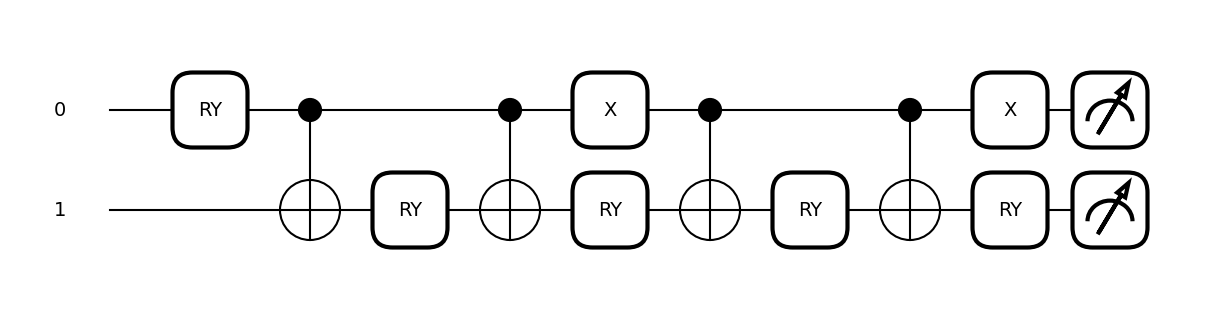

In [71]:
fig, ax = qml.draw_mpl(test)(ang)

In [72]:
#Maneira Prática

@qml.qnode(dev)# decorador que define um nó quântico utilizando dev
def test(f=None):
    qml.AmplitudeEmbedding(features=f, wires=range(2), normalize=True)#codifica o vetor em amplitudes das superposições quçanticas
    return qml.expval(qml.Z(0)), qml.state()#retorna o valor esperado da observável Z no qubit 0 e o estado quântico após a incorporação das características.

res, state = test(f=x)
print(state)
#O primeiro número 9.99984515e-01+0.j corresponde à amplitude de probabilidade do estado onde o qubit 0 está no estado base |0⟩ e o qubit 1 também está no estado base |0⟩.

#O segundo número 5.47527609e-03+0.j corresponde à amplitude de probabilidade do estado onde o qubit 0 está no estado base |0⟩ e o qubit 1 está no estado base |1⟩.

#O terceiro número 9.95504744e-04+0.j corresponde à amplitude de probabilidade do estado onde o qubit 0 está no estado base |1⟩ e o qubit 1 está no estado base |0⟩.

#O último número 0.00000000e+00+0.j corresponde à amplitude de probabilidade do estado onde o qubit 0 está no estado base |1⟩ e o qubit 1 também está no estado base |1⟩.

[9.99984515e-01+0.j 5.47527609e-03+0.j 9.95504744e-04+0.j
 0.00000000e+00+0.j]


In [73]:
print(qml.draw(test)(x))# desenha o circuito qwuântico representado pelo no test e o vetor x

0: ─╭|Ψ⟩─┤  <Z>  State
1: ─╰|Ψ⟩─┤       State


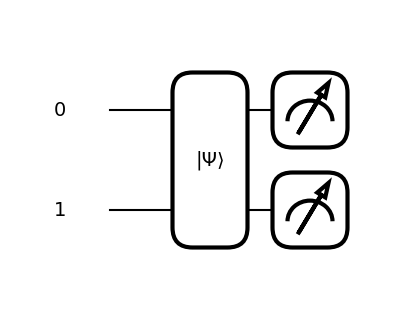

In [74]:
fig, ax = qml.draw_mpl(test)(x)

In [75]:

print("X[0] = ",X[0]) # imprime o primeiro vetor antes da normalização

X = (X.T / np.sqrt(np.sum(X**2,-1))).T#normaliza todos os vetores em X dividindo cada vetor pelo seu comprimento (norma euclidiana)
#X.T transpoe a mwatriz e o resto calcula a euclidiana de cada vetor X
print("X[0] Normalizado = ",X[0])
print(np.sum(X[0]**2))
#Isso imprime a norma euclidiana ao quadrado do primeiro vetor normalizado de X para verificar se o vetor foi normalizado corretamente

X[0] =  [2.009e+03 1.100e+01 2.000e+00 0.000e+00]
X[0] Normalizado =  [9.99984515e-01 5.47527609e-03 9.95504744e-04 0.00000000e+00]
1.0


In [76]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.25, stratify=y, random_state = 12)

In [77]:
print(X_train.shape)

(150, 4)


In [78]:
dev = qml.device("default.qubit") #pertecnte ao framework pennylane

In [79]:
# implementa um classificador variacional utilizando um circuito quântico, sendo o classificador composto de camadas de operações quanticas(rotações e portas CNOT)
#Modelo
def layer(layer_weights): #aplica uma camda de circuito quantico
    for wire in range(2):
        qml.Rot(*layer_weights[wire], wires=wire) #para cada quibit aplica uma porta de rotação 'qml.Rot' com os paramewtros fornecidos
    qml.CNOT(wires=[0, 1]) #aplica uma porta CNot entre os dois quibits

def accuracy(labels, predictions): #calcula a precisao das previsoes comparado-as com os rotulos verdadeiros
    acc = sum(abs(l - p) < 1e-5 for l, p in zip(labels, predictions))
    acc = acc / len(labels)
    return acc

def square_loss(labels, predictions): # calcula a perda quadratica entre os rotulos verdaeiros e as previsoes
    # We use a call to qml.math.stack to allow subtracting the arrays directly
    return np.mean((labels - qml.math.stack(predictions)) ** 2)

def cost(weights, bias, X, Y): # calcula o custo, perda total entre um conjunto de pesos, bias, entradas e saidas
    # Transpose the batch of input data in order to make the indexing
    # in state_preparation work
    predictions = variational_classifier(weights, bias, X)

    return square_loss(Y, predictions)

@qml.qnode(dev)#define o circuito quantico para o classificador variacional
def circuit(weights, x):
#Decorador que converte a função circuit em um nó quântico que pode ser executado no dev
    qml.AmplitudeEmbedding(features=x, wires=range(2), normalize=True)

    for layer_weights in weights:
        layer(layer_weights)
#Aplica várias camadas do circuito, cada uma com seus próprios pesos.
    return qml.expval(qml.PauliZ(0)) # faz previsões baseadas na medição do valor esperado do operador Pauli-Z
#Mede o valor esperado do operador Pauli-Z no primeiro qubit.
def variational_classifier(weights, bias, x):
    return abs(circuit(weights, x)) + bias


In [80]:
from pennylane import numpy as np
num_qubits = 2 #define que o circuito terá 2 qubits
num_layers = 10 #10 camadas de operações quanticas

weights_init = 0.01 * np.random.randn(num_layers, num_qubits, 3, requires_grad=True) #aqui vai gerar uma matriz de pesos, usando uma distribuição normal com media 0 e desvio padrao 1
bias_init = np.array(0.0, requires_grad=True)#cria um array numpy do pennylane com um valor 0 e especifica que ele é diferenciavel, (isso permite otimização)

In [81]:
print(weights_init.shape)
print(weights_init)

(10, 2, 3)
[[[ 0.00393016  0.00465204 -0.01041843]
  [-0.0133974  -0.01819221  0.00578647]]

 [[-0.0072613  -0.00478414  0.0073739 ]
  [ 0.0207687   0.00588841  0.00920136]]

 [[-0.01399075 -0.01678913 -0.00611837]
  [ 0.02362221  0.0004907   0.01025529]]

 [[-0.00909855  0.00106138  0.00286517]
  [ 0.0020921   0.00279844  0.00340478]]

 [[-0.00962633 -0.00711799  0.00422448]
  [ 0.0016255  -0.0020355  -0.01029209]]

 [[-0.00642811  0.00467709 -0.00732104]
  [-0.01274747 -0.00729183 -0.00234515]]

 [[-0.01289358 -0.01014673 -0.00395506]
  [-0.00790596  0.01566313  0.00156159]]

 [[ 0.00024846  0.00264811  0.00782906]
  [-0.00103251 -0.00014509 -0.01836015]]

 [[ 0.00373146 -0.00469668  0.0076573 ]
  [-0.00357739 -0.00239918  0.00355556]]

 [[ 0.01568331  0.00643229  0.00974894]
  [-0.00091763 -0.00083035 -0.01786822]]]


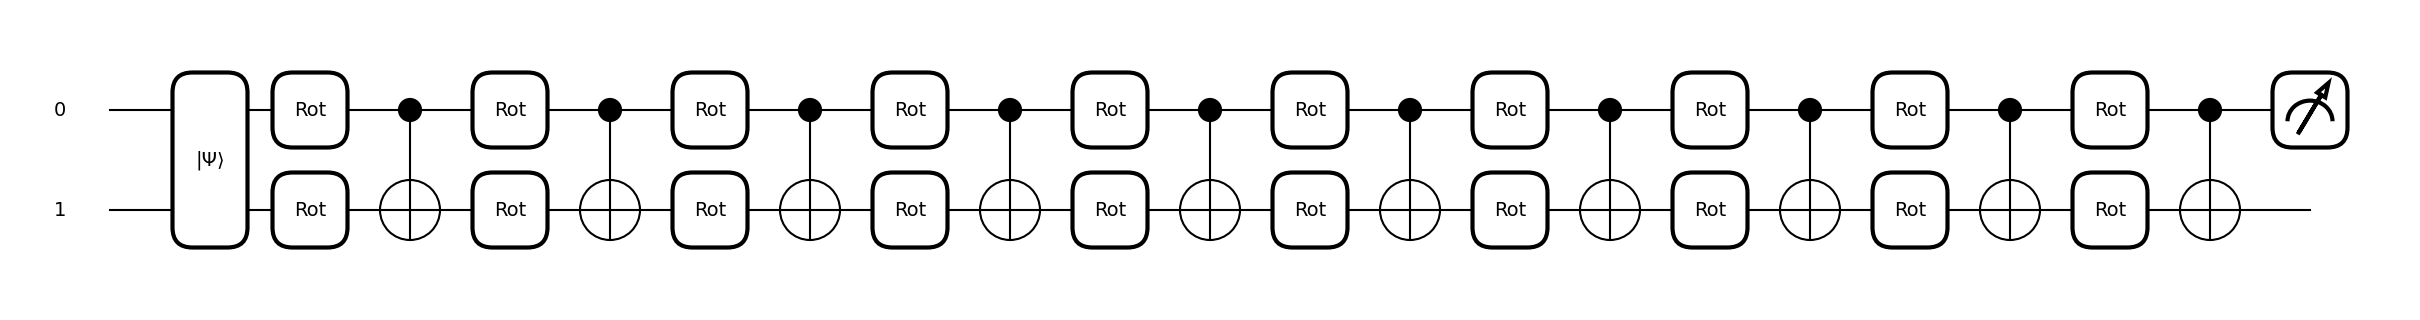

In [82]:
fig, ax = qml.draw_mpl(circuit)(weights_init,[1,0,0,0])#usando o vetor de entrada [1,0,0,0] para o circuito quantico

In [83]:
def treshold(x):#deveria se chamar threshold kkk
    if x < 0.33:
        return 0.0
    elif x < 0.66:
        return 0.5
    else:
        return 1.0
#discretizar um valor contínuo.

In [84]:
opt = NesterovMomentumOptimizer(0.01)
batch_size = 5

# train the variational classifier
weights = weights_init
bias = bias_init
for it in range(100):
    # Update the weights by one optimizer step
    batch_index = np.random.randint(0, len(y_train), (batch_size,))
    X_train_batch = X_train[batch_index]
    y_train_batch = y_train[batch_index]

    weights, bias, _, _ = opt.step(cost, weights, bias, X_train_batch, y_train_batch)

    # Compute predictions on train
    predictions_train = variational_classifier(weights, bias, X_train)
    predictions_train = np.array(list(map(treshold,predictions_train)))

    # Compute accuracy on train and validation set
    acc_train = accuracy(y_train, predictions_train)

    if (it + 1) % 10 == 0:
        _cost = cost(weights, bias, X_train, y_train)
        print(
            f"Iter: {it + 1:5d} | Cost: {_cost:0.7f} | "
            f"Acc train: {acc_train:0.7f}"
        )

Iter:    10 | Cost: 0.3365480 | Acc train: 0.0000000
Iter:    20 | Cost: 0.3328735 | Acc train: 0.0000000
Iter:    30 | Cost: 0.3185490 | Acc train: 0.0000000
Iter:    40 | Cost: 0.3225657 | Acc train: 0.0000000
Iter:    50 | Cost: 0.3244552 | Acc train: 0.0000000
Iter:    60 | Cost: 0.3220066 | Acc train: 0.0000000
Iter:    70 | Cost: 0.3178905 | Acc train: 0.0000000
Iter:    80 | Cost: 0.3182575 | Acc train: 0.0000000
Iter:    90 | Cost: 0.3226651 | Acc train: 0.0000000
Iter:   100 | Cost: 0.3258343 | Acc train: 0.0000000


In [85]:
pred = variational_classifier(weights, bias, X_train)
pred = np.array(list(map(treshold,pred)))


print(classification_report(y_train*2,pred*2))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      80.0
         1.0       0.00      0.00      0.00       0.0
         2.0       0.00      0.00      0.00      65.0
         4.0       0.00      0.00      0.00       5.0

    accuracy                           0.00     150.0
   macro avg       0.00      0.00      0.00     150.0
weighted avg       0.00      0.00      0.00     150.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [86]:
pred = variational_classifier(weights, bias, X_test)
pred = np.array(list(map(treshold,pred)))

print(classification_report(y_test*2,pred*2))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      27.0
         1.0       0.00      0.00      0.00       0.0
         2.0       0.00      0.00      0.00      21.0
         4.0       0.00      0.00      0.00       2.0

    accuracy                           0.00      50.0
   macro avg       0.00      0.00      0.00      50.0
weighted avg       0.00      0.00      0.00      50.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [87]:
pred = variational_classifier(weights, bias, X_test)
pred_2 = np.array(list(map(treshold,pred)))

for p,p2, y_ in zip(pred,pred_2,y_test):
    print(f"Modelo =  {p:+.2f} |  Threshold =  {p2*2:.0f}, | Real = {y_*2:.0f}")

Modelo =  +0.60 |  Threshold =  1, | Real = 0
Modelo =  +0.60 |  Threshold =  1, | Real = 2
Modelo =  +0.60 |  Threshold =  1, | Real = 0
Modelo =  +0.60 |  Threshold =  1, | Real = 0
Modelo =  +0.60 |  Threshold =  1, | Real = 0
Modelo =  +0.60 |  Threshold =  1, | Real = 2
Modelo =  +0.60 |  Threshold =  1, | Real = 0
Modelo =  +0.60 |  Threshold =  1, | Real = 0
Modelo =  +0.60 |  Threshold =  1, | Real = 0
Modelo =  +0.60 |  Threshold =  1, | Real = 2
Modelo =  +0.60 |  Threshold =  1, | Real = 2
Modelo =  +0.60 |  Threshold =  1, | Real = 0
Modelo =  +0.60 |  Threshold =  1, | Real = 0
Modelo =  +0.60 |  Threshold =  1, | Real = 2
Modelo =  +0.60 |  Threshold =  1, | Real = 2
Modelo =  +0.60 |  Threshold =  1, | Real = 2
Modelo =  +0.60 |  Threshold =  1, | Real = 2
Modelo =  +0.60 |  Threshold =  1, | Real = 2
Modelo =  +0.60 |  Threshold =  1, | Real = 2
Modelo =  +0.60 |  Threshold =  1, | Real = 0
Modelo =  +0.60 |  Threshold =  1, | Real = 0
Modelo =  +0.60 |  Threshold =  1,